# **Cadena de Markov : Clima**

In [2]:
library('dplyr')
library('tidyr')
library('ggplot2')
#install.packages('diagram')
library('diagram')

In [110]:
# Función para calcular la potencia de una matriz
mmult <- function(m, n){
  # inputs:
  #   m : matriz 
  #   n : potencia
  # outputs:
  #   Mn : matriz potencia n
  for(i in 1:n){
    if(i == 1){
      Mn <- m
    }else{
      Mn <- Mn%*%m
    }
  }
  return(Mn)
}

In [108]:
# Función para generar trajectorias de una Cadena de Markov
sim.MarkovChain <- function(P, d, n=100){
  # Inputs:
  #   P  : Matriz de transición.
  #   d  : Distribución inicial. 
  #   n  : Número de trajectorias.

  n.states <- ncol(P)     # número de estados
  Xn <- numeric(n)        # inicialización de vector de tamaño n para almacenar la trajectoria
  Xn[1] <- sample(n.states, 1, replace=TRUE, prob=d)  # generación de un estado al azar con probavilidad d
  # inicia bucle for
  for(i in 2:(n)){
    # inicia con estado inicial generado anteriormente Xn[1]
    ini.state <- Xn[i-1]  
    # selecciona un estado al azar con probabilidad dada por el estado inicial
    Xn[i] <- sample(n.states, 1, replace=TRUE, prob=P[ini.state, ]) 
  }
  return(Xn-1)
}

# Generación de datos

In [97]:
weather <- c("sunny", "rain", "cloudy")

weather_data <- sample(weather, 100, replace = T)
head(weather_data)

[1] "cloudy" "rain"   "rain"   "rain"   "cloudy" "cloudy"

##  Distribución inicial

In [123]:
di <- table(weather_data) %>% prop.table()
print(di)

weather_data
cloudy   rain  sunny 
  0.36   0.38   0.26 


In [112]:
P <- embed(weather_data, 2)[,2:1] %>%
   as.data.frame() %>% 
   rename(current = V1, next_day = V2) %>% 
   group_by(current, next_day) %>%
   summarise('n'=n()) %>%
   mutate('total'=sum(n),
          'prop' = round(n/total, 2)) %>%
   arrange(current) %>%
   select(-n, -total) %>%
   pivot_wider(names_from='next_day', values_from='prop')%>%
   ungroup() %>%
   data.frame()

# elimina columna current
row.names(P) <- P[,1]
P <- as.matrix(P[,-1])


`summarise()` has grouped output by 'current'. You can override using the
`.groups` argument.


In [139]:
rowSums(P)

cloudy   rain  sunny 
  1.00   1.00   0.99

In [147]:
# matriz de transición
P

,cloudy,rain,sunny
cloudy,0.39,0.39,0.22
rain,0.30,0.38,0.32
sunny,0.38,0.38,0.24


In [148]:
P <- matrix(c(0.39, 0.39, 0.22,
              0.30, 0.38, 0.32,
              0.38, 0.38, 0.24), ncol=3, byrow=TRUE)

colnames(P) <- c('cloudy',	'rain',	'sunny')
rownames(P) <- c('cloudy',	'rain',	'sunny')

P

,cloudy,rain,sunny
cloudy,0.39,0.39,0.22
rain,0.30,0.38,0.32
sunny,0.38,0.38,0.24


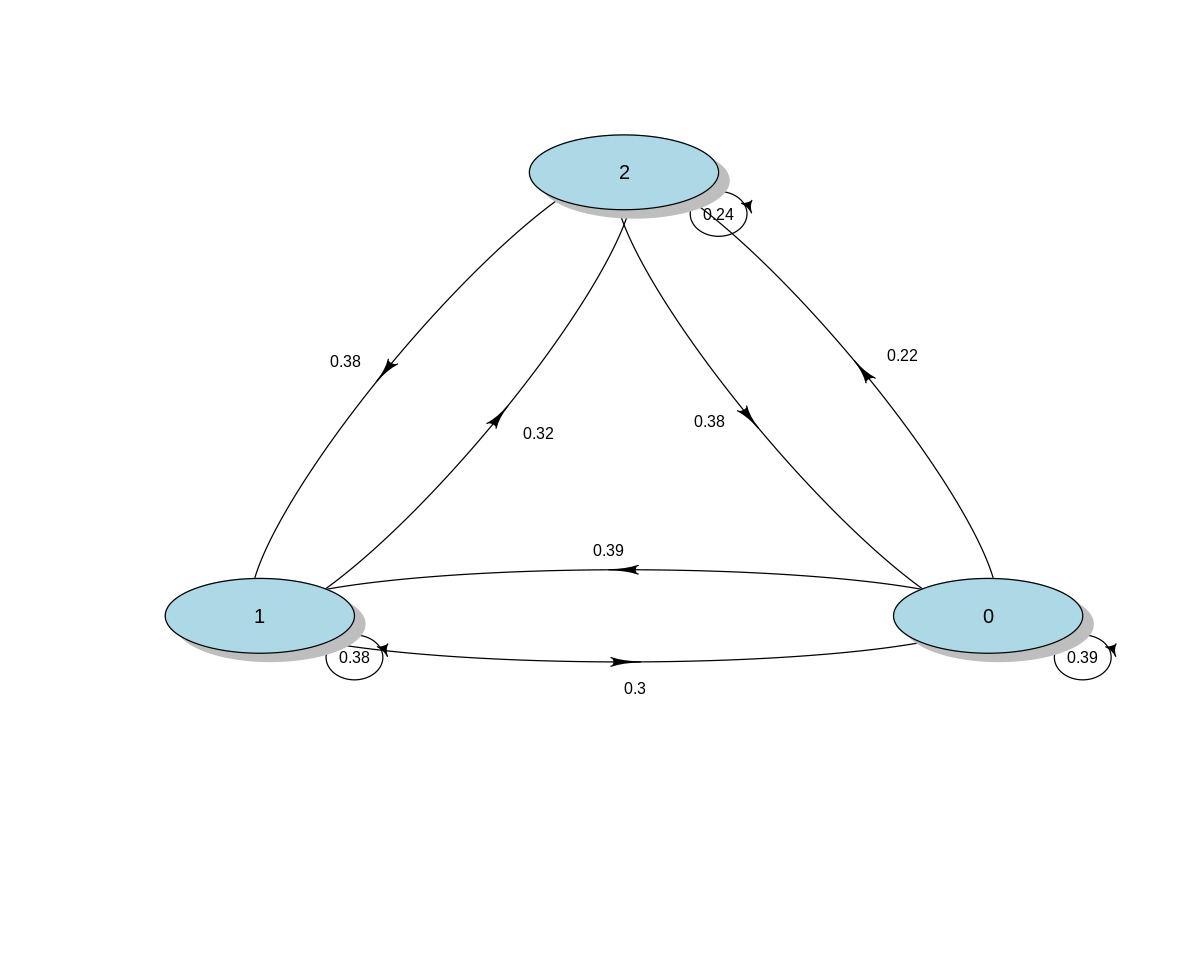

In [149]:
# Diagrama de transiciones
options(repr.plot.width=10, repr.plot.height=8)
plotmat(t(P),name=c("0","1", "2"),
arr.length=0.3,arr.width=0.1,box.col="lightblue",box.lwd=1,box.prop=0.5,box.size=0.09,
box.type="circle",cex.txt=0.8,lwd=1,self.cex=0.3,
self.arrpos=0.3,self.shiftx=0.09,self.shifty=-0.05)

# Probabilidades de transición a n pasos

In [150]:
n.max = 1000
for(i in 1:n.max){
    Pn <- mmult(P, n=i)
    cat(paste('Matriz de probabilidades de transición a n= ', i, ' pasos \n', sep=''))
    print(Pn)
}

Matriz de probabilidades de transición a n= 1 pasos 
       cloudy rain sunny
cloudy   0.39 0.39  0.22
rain     0.30 0.38  0.32
sunny    0.38 0.38  0.24
Matriz de probabilidades de transición a n= 2 pasos 
       cloudy   rain  sunny
cloudy 0.3527 0.3839 0.2634
rain   0.3526 0.3830 0.2644
sunny  0.3534 0.3838 0.2628
Matriz de probabilidades de transición a n= 3 pasos 
         cloudy     rain    sunny
cloudy 0.352815 0.383527 0.263658
rain   0.352886 0.383526 0.263588
sunny  0.352830 0.383534 0.263636
Matriz de probabilidades de transición a n= 4 pasos 
          cloudy      rain     sunny
cloudy 0.3528460 0.3835282 0.2636259
rain   0.3528468 0.3835289 0.2636244
sunny  0.3528456 0.3835283 0.2636261
Matriz de probabilidades de transición a n= 5 pasos 
          cloudy      rain     sunny
cloudy 0.3528462 0.3835285 0.2636253
rain   0.3528462 0.3835285 0.2636254
sunny  0.3528462 0.3835285 0.2636254
Matriz de probabilidades de transición a n= 6 pasos 
          cloudy      rain     sunny
c

# Distribución a n pasos

\begin{equation}
\pi^n  = \pi^{n-1} \textbf{P}  = \pi^0 \textbf{P}^{(n)} 
\end{equation}

In [152]:
head(Pn)

,cloudy,rain,sunny
cloudy,0.3528462,0.3835285,0.2636254
rain,0.3528462,0.3835285,0.2636254
sunny,0.3528462,0.3835285,0.2636254


In [170]:
# distribución inicial
di <- c(1, 0, 0)

# distribución a n pasos
n <- 1000
Dn <- matrix(0, ncol=ncol(P), nrow=n)

for(i in 1:n){
    Dn[i,] <- di%*%mmult(P, n=i)
    cat(paste('Distribución a n= ', i, ' pasos \n', sep=''))
    print(di%*%mmult(P, n=i))
}

Distribución a n= 1 pasos 
     cloudy rain sunny
[1,]   0.39 0.39  0.22
Distribución a n= 2 pasos 
     cloudy   rain  sunny
[1,] 0.3527 0.3839 0.2634
Distribución a n= 3 pasos 
       cloudy     rain    sunny
[1,] 0.352815 0.383527 0.263658
Distribución a n= 4 pasos 
       cloudy      rain     sunny
[1,] 0.352846 0.3835282 0.2636259
Distribución a n= 5 pasos 
        cloudy      rain     sunny
[1,] 0.3528462 0.3835285 0.2636253
Distribución a n= 6 pasos 
        cloudy      rain     sunny
[1,] 0.3528462 0.3835285 0.2636254
Distribución a n= 7 pasos 
        cloudy      rain     sunny
[1,] 0.3528462 0.3835285 0.2636254
Distribución a n= 8 pasos 
        cloudy      rain     sunny
[1,] 0.3528462 0.3835285 0.2636254
Distribución a n= 9 pasos 
        cloudy      rain     sunny
[1,] 0.3528462 0.3835285 0.2636254
Distribución a n= 10 pasos 
        cloudy      rain     sunny
[1,] 0.3528462 0.3835285 0.2636254
Distribución a n= 11 pasos 
        cloudy      rain     sunny
[1,] 0.3528462 0

In [171]:
df <- data.frame('n'=1:n, Dn)
colnames(df) <- c('n', 'Cloudy', 'Rainy', 'Sunny')
tail(df)

,n,Cloudy,Rainy,Sunny
,<int>,<dbl>,<dbl>,<dbl>
995,995,0.3528462,0.3835285,0.2636254
996,996,0.3528462,0.3835285,0.2636254
997,997,0.3528462,0.3835285,0.2636254
998,998,0.3528462,0.3835285,0.2636254
999,999,0.3528462,0.3835285,0.2636254
1000,1000,0.3528462,0.3835285,0.2636254


In [172]:
df <- df %>% 
  pivot_longer(!n, names_to='State', values_to='Probability')
head(df)

n,State,Probability
<int>,<chr>,<dbl>
1,Cloudy,0.3900
1,Rainy,0.3900
1,Sunny,0.2200
2,Cloudy,0.3527
2,Rainy,0.3839
2,Sunny,0.2634


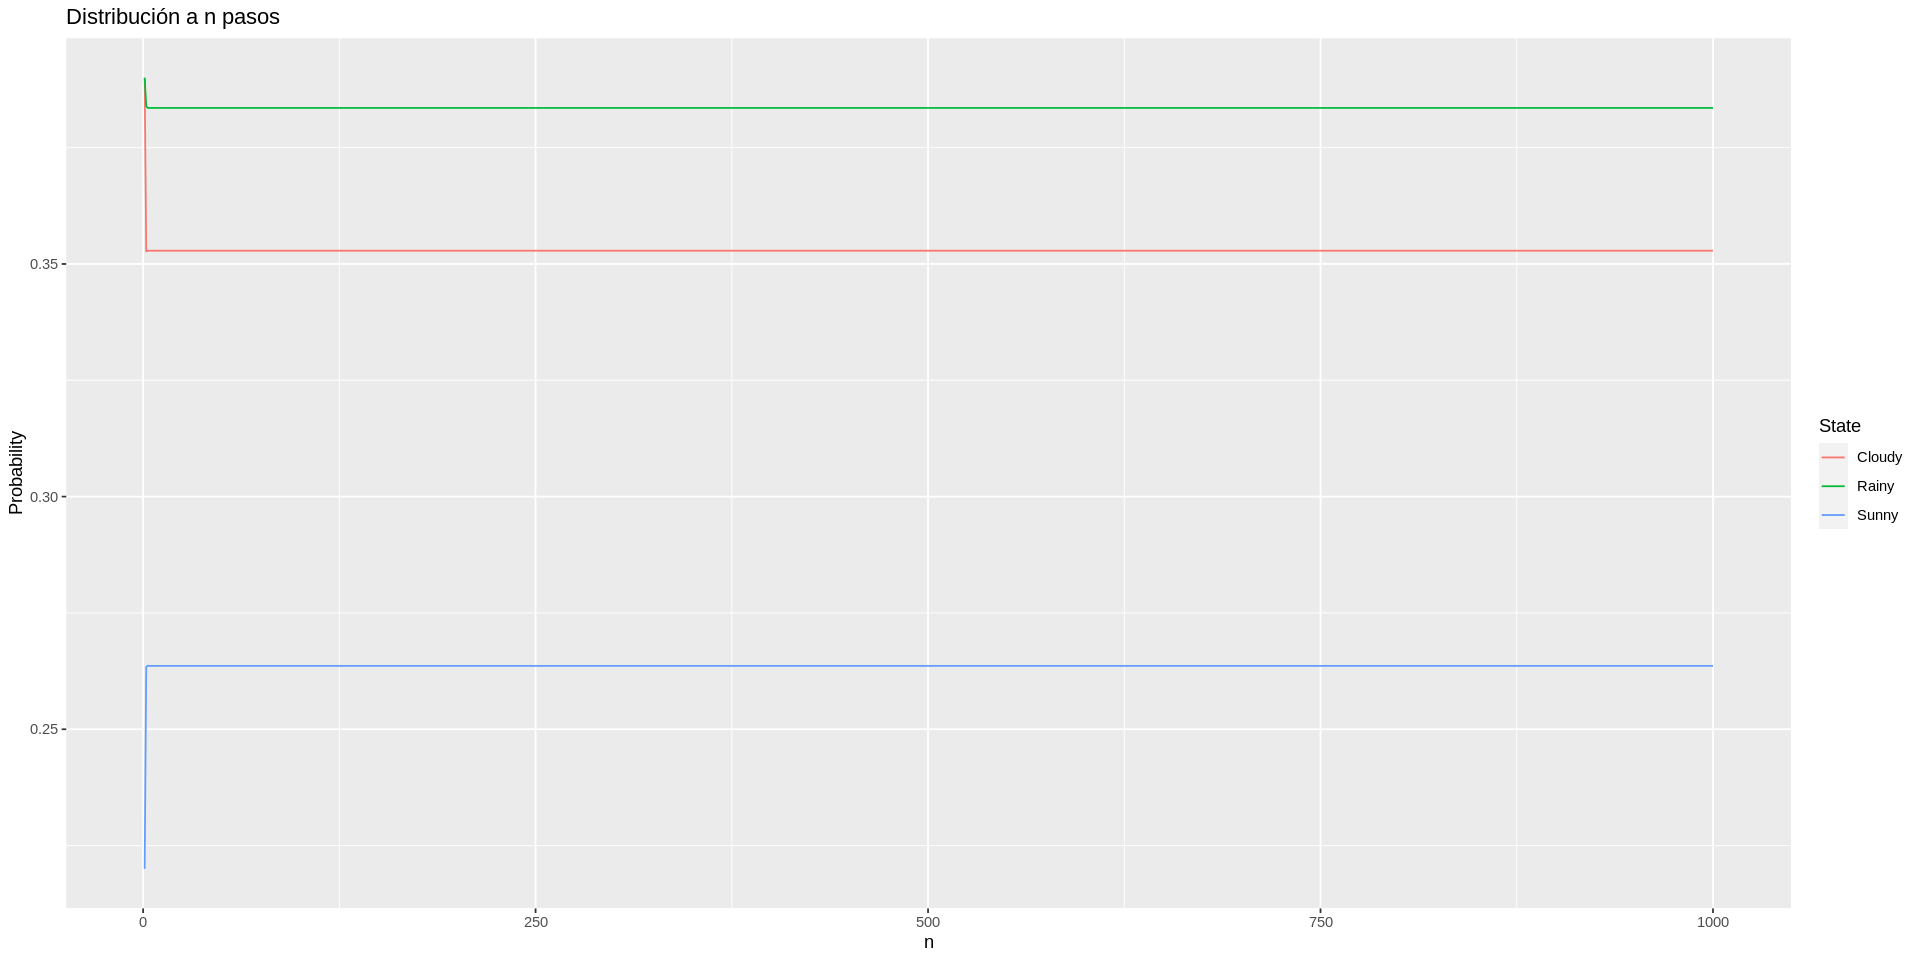

In [173]:
options(repr.plot.width=16, repr.plot.height=8)
p1 <- ggplot(df, aes(x=n, y=Probability, color=State)) +
  ggtitle('Distribución a n pasos') +
  geom_line()
p1

## Simulación de múltiples trajectorias 

In [174]:
# número de pasos a generar
n = 100
# número de trajectorias
m = 10
# distribución inicial
d <- c(1, 0, 0)
# matriz de probabilidades de transición
P <- matrix(c(0.39, 0.39, 0.22,
              0.30, 0.38, 0.32,
              0.38, 0.38, 0.24), ncol=3, byrow=TRUE)

colnames(P) <- c('cloudy',	'rain',	'sunny')
rownames(P) <- c('cloudy',	'rain',	'sunny')

In [175]:
# simulación de m trajectorias con n pasos
mat.sim <- matrix(0, ncol=n, nrow=m)
for(i in 1:m){
  mat.sim[i,] <- sim.MarkovChain(P, d, n)
}
# data.frame
df_mat_sim <- data.frame('m'= 1:m, mat.sim)
# colnames
colnames(df_mat_sim) <- c('m', sapply(1:n, function(i) paste('S_',i, sep='')))
head(df_mat_sim)

,m,S_1,S_2,S_3,S_4,S_5,S_6,S_7,S_8,S_9,⋯,S_91,S_92,S_93,S_94,S_95,S_96,S_97,S_98,S_99,S_100
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0,1,1,1,1,0,0,1,0,⋯,0,0,0,2,0,1,1,0,0,1
2,2,0,1,2,1,1,1,2,1,1,⋯,2,0,0,1,1,0,1,1,0,0
3,3,0,0,1,1,0,1,2,2,1,⋯,1,1,1,1,1,2,1,0,1,2
4,4,0,1,0,0,1,1,1,2,1,⋯,2,0,0,1,2,2,1,0,2,1
5,5,0,0,2,1,1,0,2,1,2,⋯,2,1,2,0,0,1,2,1,2,2
6,6,0,1,0,1,2,1,1,0,1,⋯,1,0,1,2,1,2,1,0,1,0


In [177]:
df_final <- df_mat_sim %>%
  pivot_longer(!m, names_to='Step', values_to='value') %>%
  mutate(Step = as.numeric(substring(Step,3,10))) %>%
  mutate(m = as.character(m))
 head(df_final) 

m,Step,value
<chr>,<dbl>,<dbl>
1,1,0
1,2,1
1,3,1
1,4,1
1,5,1
1,6,0


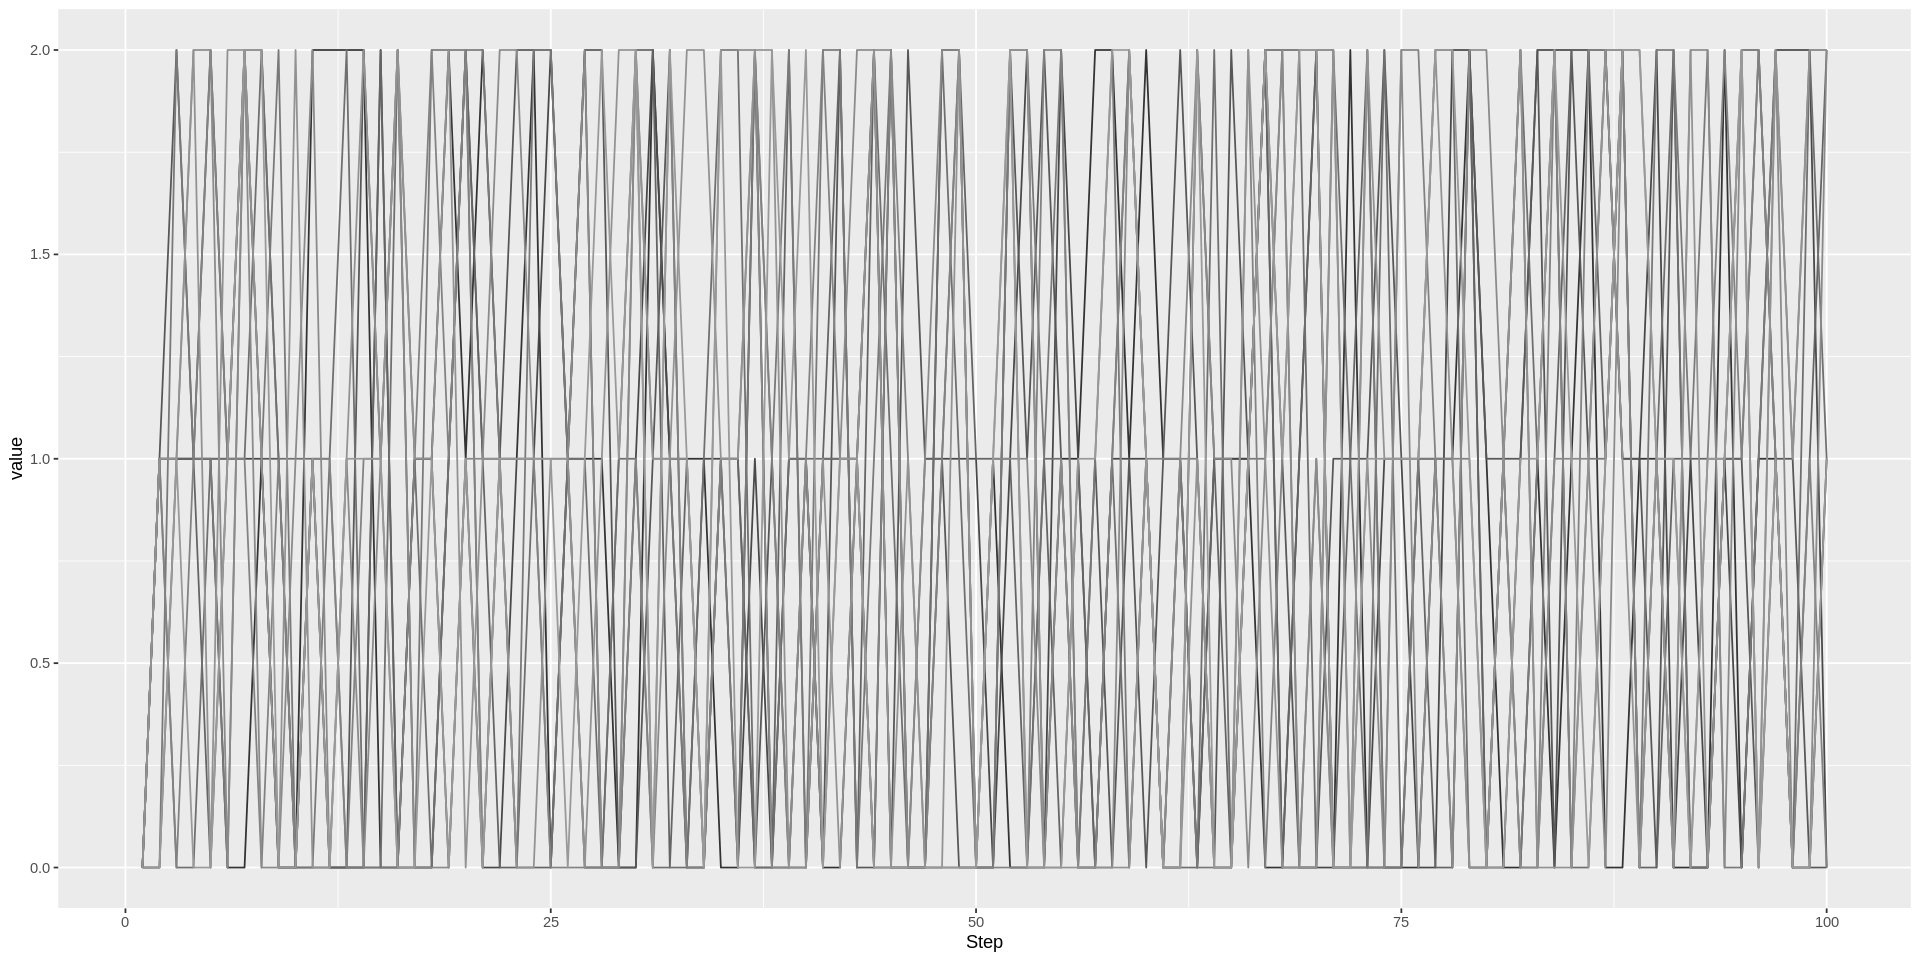

In [178]:
# gráfico de múltiples trayectorias
p5 <- ggplot(df_final, aes(x=Step, y=value, color=m)) +
  geom_line() +
  scale_colour_grey(start = 0.2,end = 0.6) +
  theme(legend.position="none") 
  
p5

# **Teorema ergódico**

In [185]:
# número de pasos a generar
n = 5000
# distribución inicial
d <- list('state0'=c(1, 0, 0),
          'state1'=c(0, 1, 0),
          'state2'=c(0, 0, 1))
# nombre de estado          
names <- names(d)
# matriz de probabilidades de transición
P <- matrix(c(0.39, 0.39, 0.22,
              0.30, 0.38, 0.32,
              0.38, 0.38, 0.24), ncol=3, byrow=TRUE)

colnames(P) <- c('cloudy',	'rain',	'sunny')
rownames(P) <- c('cloudy',	'rain',	'sunny')

In [186]:
# simulación de una trajectoria con n = 100 pasos
sim_01 <- sim.MarkovChain(P, d[[1]], n)
#print(sim_01)
cm_n <- data.frame('state.ini'= names[1], 'n'= 1:n, 'state.fin'= sim_01)
for(i in 2:length(d)){
  sim_i <- sim.MarkovChain(P, d[[i]], n)
  cm_i <- data.frame('state.ini'= names[i], 'n'= 1:n, 'state.fin'= sim_i)
  cm_n <- rbind(cm_n, cm_i)
}
head(cm_n)

,state.ini,n,state.fin
,<chr>,<int>,<dbl>
1,state0,1,0
2,state0,2,2
3,state0,3,0
4,state0,4,1
5,state0,5,1
6,state0,6,0


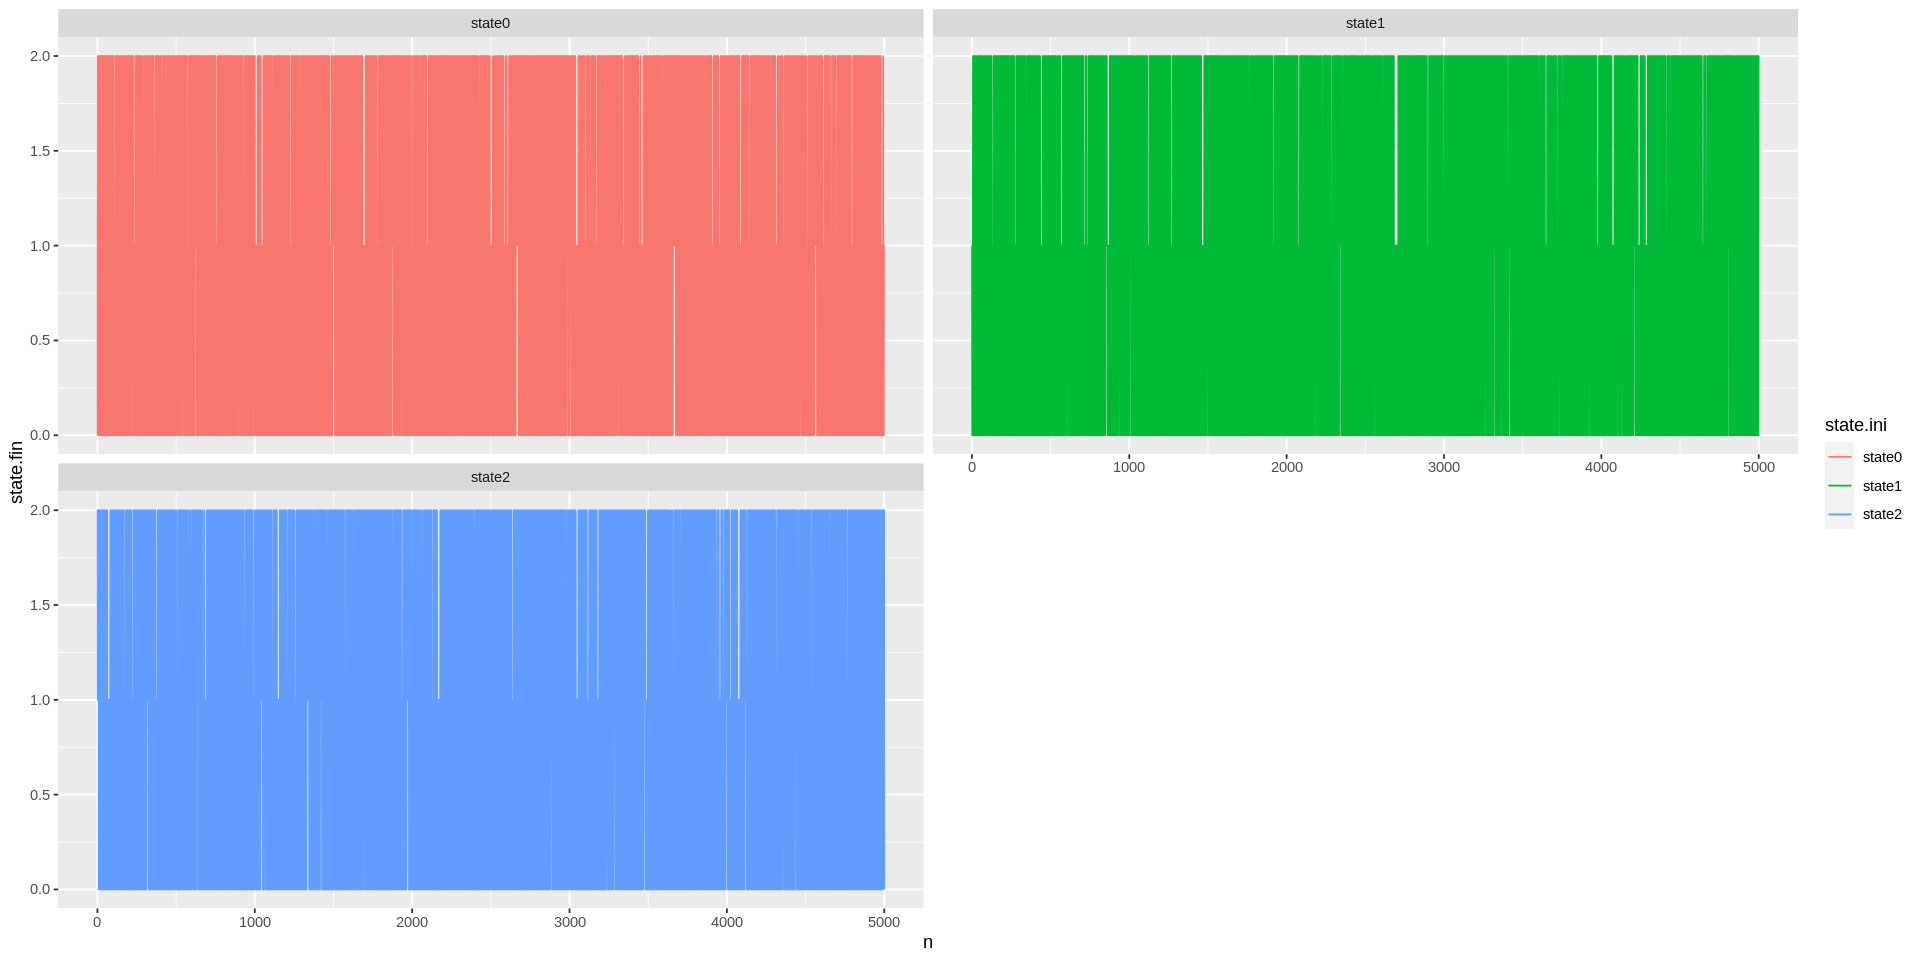

In [187]:
# plot
p2 <- ggplot(cm_n, aes(x=n, y=state.fin, col=state.ini)) +
  geom_line() +
  facet_wrap(~state.ini, nrow = 2)
p2

## Toerema ergódico

Si una cadena es irreducible y recurrente, entonces se cumple que

\begin{equation}
\lim_{n \rightarrow \infty} \frac{1}{n} N_{ij}(n) = \frac{1}{\mu_j}   , c.s.
\end{equation}

donde
- $N_{ij}(n)$ : Número de veces que la cadena pasa por el estado $j$ partiendo del estado $i$ al tiempo $n$.
- $\mu_j$ : Tiempo medio de recurrecncia del estado $j$. 

In [188]:
# Número 
cm_n %>% 
  group_by(state.ini, state.fin) %>%
  summarise('n'=n())%>%
  mutate('total'=sum(n),
         'Prop' = n/total) %>%
  select(-n, -total) %>%
  pivot_wider(names_from='state.fin', values_from='Prop', values_fill = 0)

`summarise()` has grouped output by 'state.ini'. You can override using the
`.groups` argument.


state.ini,0,1,2
<chr>,<dbl>,<dbl>,<dbl>
state0,0.3580,0.3822,0.2598
state1,0.3526,0.3804,0.2670
state2,0.3558,0.3920,0.2522


Por lo que 

$$\frac{1}{\mu_0} = 0.3580, \ \frac{1}{\mu_1} = 0.3804, \ \frac{1}{\mu_2} = 0.2522$$

In [189]:
#  Tiempos medios de recurrencia
cm_n %>% 
  group_by(state.ini, state.fin) %>%
  summarise('n'=n())%>%
  mutate('total'=sum(n),
         'Prop' = total/n) %>%
  select(-n, -total) %>%
  pivot_wider(names_from='state.fin', values_from='Prop', values_fill = 0)

`summarise()` has grouped output by 'state.ini'. You can override using the
`.groups` argument.


state.ini,0,1,2
<chr>,<dbl>,<dbl>,<dbl>
state0,2.793296,2.616431,3.849115
state1,2.836075,2.628812,3.745318
state2,2.810568,2.551020,3.965107


In [192]:
1/3.9651

[1] 0.2522004

$$π_0 = 1/2.77 = 0.3588$$
$$π_1 = 1/2.6288 = 0.3804$$
$$π_2 = 1/2.6288 = 0.2522$$